# Railway Track Fault Detection
## [Dataset](https://www.kaggle.com/salmaneunus/railway-track-fault-detection)

In [ ]:
!pip install -q efficientnet


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [6]:
train_dir = 'E:/integration/integration/integration/Railway Track fault Detection Updated/Train'
val_dir   = 'E:/integration/integration/integration/Railway Track fault Detection Updated/Validation'
test_dir  = 'E:/integration/integration/integration/Railway Track fault Detection Updated/Test'

In [7]:
import os
train_defective_fnames = os.listdir(train_dir+'/Defective' )
train_nondefective_fnames = os.listdir(train_dir+'/Non defective')

## Show Dataset Images

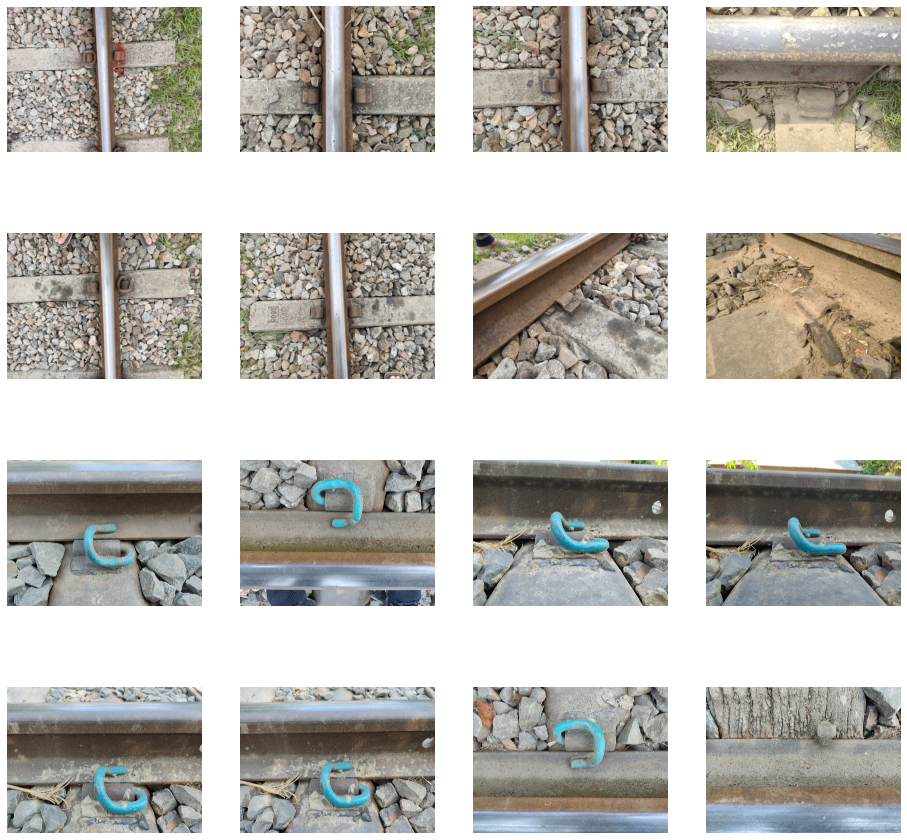

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x10 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_defective_pix = [os.path.join(train_dir+'/Defective', fname) 
                for fname in train_defective_fnames[pic_index-8:pic_index]]
next_nondefective_pix = [os.path.join(train_dir+'/Non defective', fname) 
                for fname in train_nondefective_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_defective_pix+next_nondefective_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Data Augmentation

In [9]:

target_size=(300,300)
batch_size = 16

In [20]:
!pip3 install keras
import keras
from keras.tensorflow.preprocessing.image import ImageDataGenerator
#import tensorflow.eras
train_datagen = keras.layers.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'keras'

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode=None)

## Build Model (EfficienetNet)

In [ ]:
num_classes = 2
input_shape = (300,300,3)

In [ ]:
import efficientnet.tfkeras as efn
from tensorflow.keras import models, layers, optimizers, regularizers, callbacks

base_model = efn.EfficientNetB7(input_shape=input_shape, weights='imagenet', include_top=False)
base_model.trainable = False # freeze the base model (for transfer learning)

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128)(x)
out = layers.Dense(num_classes, activation="softmax")(x)

model = models.Model(inputs=base_model.input, outputs=out)

model.summary()

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
## set Checkpoint : save best only, verbose on
#checkpoint = callbacks.ModelCheckpoint("railtrack_enetB7.hdf5", monitor='accuracy', verbose=0, save_best_only=True, mode='auto', save_freq=1)

## Train Model

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VAL  =val_generator.n//val_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size
num_epochs = 5

In [ ]:
# Train Model
history = model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,epochs=num_epochs, validation_data=val_generator, validation_steps=STEP_SIZE_VAL) #, callbacks=[checkpoint])

## Save Model

In [ ]:
## Save Model
models.save_model(model, 'railway_track_fault_detection.h5')

In [ ]:
## load best model weights if using callback (save-best-only)
#model.load_weights("railtrack_enetB7.hdf5")

## Evaluate Model

In [ ]:
score = model.evaluate(test_generator, steps=STEP_SIZE_TEST) # with test dataset
print(score)

1/1 [==============================] - 7s 7s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]


## Confusion Matrix

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

predY=model.predict(test_generator) # with validation dataset
y_pred = np.argmax(predY,axis=1)
y_actual = test_generator.classes
cm = confusion_matrix(y_actual, y_pred)
print(cm)

[[8 3]
 [2 9]]


In [ ]:
# report confusion matrix
labels = ['Defective', 'Non Defective']
print(classification_report(y_actual, y_pred, target_names=labels))

../input/railway-track-fault-detection/Railway Track fault Detection Updated/Test/Defective/IMG_20201114_101200.jpg ['Defective', 'Non Defective']
               precision    recall  f1-score   support

    Defective       0.80      0.73      0.76        11
Non Defective       0.75      0.82      0.78        11

     accuracy                           0.77        22
    macro avg       0.78      0.77      0.77        22
 weighted avg       0.78      0.77      0.77        22



## Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


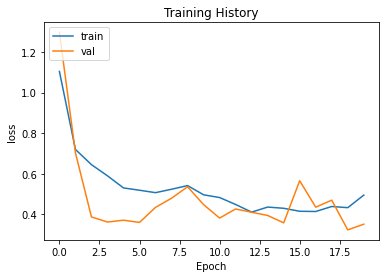

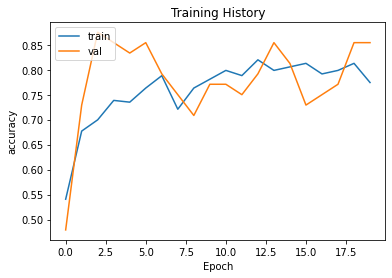

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,val): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[val])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

[[1. 0.]]


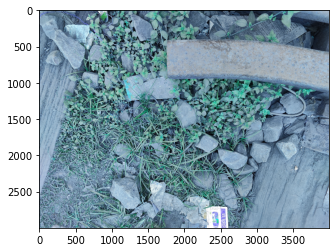

In [ ]:
import cv2
import numpy as np
img = cv2.imread("../input/railway-track-fault-detection/Railway Track fault Detection Updated/Test/Defective/IMG_20201211_121713.jpg")
plt.imshow(img)
img = cv2.resize(img,(300,300))
img = np.reshape(img,[1,300,300,3])

classes = model.predict(img)

print(classes)
#if classes<0.5:
 #   print("This Railway track has no fault")
#else:
 #   print("This Railway track has fault")